In [2]:
import xarray as xr
import cfgrib

# Attempt 1: Load specific parameters
ds = xr.open_dataset(
    r"D:\FYP\data\8aef3fa9d9341d0bab5cc2c303e5068b.grib",
    engine='cfgrib',
    backend_kwargs={'filter_by_keys': {'shortName': '2t'}}
)

Ignoring index file 'D:\\FYP\\data\\8aef3fa9d9341d0bab5cc2c303e5068b.grib.47d85.idx' incompatible with GRIB file


In [4]:
import numpy as np

# Remove NaN values and extract months from valid data points
valid_times = ds['t2m'].dropna(dim="time")
unique_months = np.unique(valid_times.time.dt.month)

print(unique_months)  # This should only show months with real temperature data


[5 6 7 8]


In [5]:
print("\nMissing data check:")
print("Number of NaN values:", np.isnan(ds["t2m"]).sum().values)
print("Percentage of missing data: {:.2f}%".format(
    (np.isnan(ds["t2m"]).sum().values / ds["t2m"].size) * 100
))


Missing data check:
Number of NaN values: 0
Percentage of missing data: 0.00%


In [6]:
mean_temp = ds["t2m"].mean(dim="time")  # Mean across time dimension
mean_temp = mean_temp.values -273.15
print("Min:", mean_temp.min())
print("Max:", mean_temp.max())
print("Mean:", mean_temp.mean())

Min: -7.932312
Max: 41.601105
Mean: 28.701273


In [7]:
# Get the coordinates where maximum temperature occurs
max_temp_idx = ds['t2m'].argmax(dim=['time', 'latitude', 'longitude'])
max_temp_value = ds['t2m'].max()

# Get indices for each dimension
time_idx = max_temp_idx['time'].item()
lat_idx = max_temp_idx['latitude'].item()
lon_idx = max_temp_idx['longitude'].item()

# Extract actual coordinates
time = ds.time[time_idx]
latitude = ds.latitude[lat_idx]
longitude = ds.longitude[lon_idx]

print(f"Maximum temperature: {max_temp_value.values - 273.15:.2f}°C")
print(f"Time: {time.values}")
print(f"Latitude: {latitude.values:.2f}°N")
print(f"Longitude: {longitude.values:.2f}°E")

# Get the minimum temperature at the same location
min_temp = ds['t2m'].sel(latitude=latitude, longitude=longitude).min()

# Calculate the temperature range
temp_range = max_temp_value - min_temp

print(f"\nAt location ({latitude.values:.2f}°N, {longitude.values:.2f}°E):")
print(f"Minimum temperature: {min_temp.values - 273.15:.2f}°C")
print(f"Temperature range: {temp_range.values:.2f}K")
# Get the time when minimum temperature occurred at the same location
min_temp_time_idx = ds['t2m'].sel(latitude=latitude, longitude=longitude).argmin()
min_temp_time = ds.time[min_temp_time_idx]

print(f"\nTime of minimum temperature: {min_temp_time.values}")


Maximum temperature: 53.76°C
Time: 2017-05-29T11:00:00.000000000
Latitude: 25.75°N
Longitude: 62.50°E

At location (25.75°N, 62.50°E):
Minimum temperature: 25.68°C
Temperature range: 28.07K

Time of minimum temperature: 1986-07-29T16:00:00.000000000


In [8]:
ds_daily = ds.resample(time="1D").mean()

In [9]:
ds_daily

<xarray.Dataset> Size: 273MB
Dimensions:    (latitude: 65, longitude: 77, time: 13637)
Coordinates:
  * latitude   (latitude) float64 520B 38.5 38.25 38.0 37.75 ... 23.0 22.75 22.5
  * longitude  (longitude) float64 616B 59.5 59.75 60.0 ... 78.0 78.25 78.5
  * time       (time) datetime64[ns] 109kB 1980-05-01 1980-05-02 ... 2017-08-31
    number     int64 8B 0
    step       timedelta64[ns] 8B 00:00:00
    surface    float64 8B 0.0
Data variables:
    t2m        (time, latitude, longitude) float32 273MB 297.3 297.3 ... 301.7
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-02-19T10:55 GRIB to CDM+CF via cfgrib-0.9.1...

In [11]:
# Keep only summer months (May-August)
summer_ds = ds_daily.sel(time=ds_daily.time.dt.month.isin([5, 6, 7, 8]))

# Save filtered dataset (optional)
summer_ds.to_netcdf("summer_temperatures.nc")  # Save as NetCDF file
# or summer_ds.to_csv("summer_temperatures.csv")  # Save as CSV if needed

print(summer_ds)


<xarray.Dataset> Size: 94MB
Dimensions:    (latitude: 65, longitude: 77, time: 4674)
Coordinates:
  * latitude   (latitude) float64 520B 38.5 38.25 38.0 37.75 ... 23.0 22.75 22.5
  * longitude  (longitude) float64 616B 59.5 59.75 60.0 ... 78.0 78.25 78.5
  * time       (time) datetime64[ns] 37kB 1980-05-01 1980-05-02 ... 2017-08-31
    number     int64 8B 0
    step       timedelta64[ns] 8B 00:00:00
    surface    float64 8B 0.0
Data variables:
    t2m        (time, latitude, longitude) float32 94MB 297.3 297.3 ... 301.7
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-02-19T10:55 GRIB to CDM+CF via cfgrib-0.9.1...


In [12]:
print(summer_ds)

<xarray.Dataset> Size: 94MB
Dimensions:    (latitude: 65, longitude: 77, time: 4674)
Coordinates:
  * latitude   (latitude) float64 520B 38.5 38.25 38.0 37.75 ... 23.0 22.75 22.5
  * longitude  (longitude) float64 616B 59.5 59.75 60.0 ... 78.0 78.25 78.5
  * time       (time) datetime64[ns] 37kB 1980-05-01 1980-05-02 ... 2017-08-31
    number     int64 8B 0
    step       timedelta64[ns] 8B 00:00:00
    surface    float64 8B 0.0
Data variables:
    t2m        (time, latitude, longitude) float32 94MB 297.3 297.3 ... 301.7
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-02-19T10:55 GRIB to CDM+CF via cfgrib-0.9.1...


In [14]:
# Calculate mean temperature across time dimension
mean_temp = summer_ds.t2m.mean(dim='time')

# Convert from Kelvin to Celsius
mean_temp_celsius = mean_temp - 273.15

# Create point-based temperature data
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Create points from temperature grid
lons, lats = np.meshgrid(mean_temp.longitude, mean_temp.latitude)
temp_df = pd.DataFrame({
    'longitude': lons.flatten(),
    'latitude': lats.flatten(),
    'temperature': mean_temp_celsius.values.flatten()
})

# Convert to GeoDataFrame
temp_gdf = gpd.GeoDataFrame(
    temp_df, 
    geometry=[Point(xy) for xy in zip(temp_df.longitude, temp_df.latitude)],
    crs="EPSG:4326"
)

# Read districts shapefile
districts = gpd.read_file('D:/FYP/active/shape/District_Boundary.shp')

# Spatial join and calculate district means
district_temps = gpd.sjoin(districts, temp_gdf, how='left', predicate='contains')
result = district_temps.groupby('DISTRICT')['temperature'].mean().round(2).reset_index()

# Sort by temperature and display nicely
result = result.sort_values('temperature', ascending=False)
print("\nDistrict Average Temperatures (°C):")
print("==================================")
for _, row in result.iterrows():
    print(f"{row['DISTRICT']:<20} {row['temperature']:>6.2f}°C")


District Average Temperatures (°C):
LEHRI                 40.47°C
NASIRABAD             39.94°C
JAFFARABAD            39.56°C
JHAL MAGSI            39.40°C
SUKKUR                39.23°C
SOHBATPUR             39.18°C
JACOBABAD             39.10°C
LARKANA               39.08°C
GHOTKI                38.88°C
NAUSHAHRO FEROZ       38.78°C
SHIKARPHUR            38.74°C
SHAHDAD KOT           38.62°C
KHAIRPUR              38.40°C
R Y KHAN              38.40°C
KASHMORE              38.39°C
DADU                  38.39°C
BAHAWALPUR            38.14°C
S. BENAZIRABAD        37.96°C
CHAGAI                37.79°C
WASHUK                37.57°C
MUZAFARGARH           37.32°C
KACHHI                37.30°C
RAJANPUR              37.25°C
LAYYAH                37.19°C
MULTAN                37.10°C
DERA BUGTI            37.05°C
LODHRAN               36.92°C
BHAKKAR               36.83°C
BAHAWALNAGAR          36.76°C
KHANEWAL              36.75°C
JHANG                 36.73°C
SANGHAR               36.71°C
VEH

In [16]:
result.to_csv("district_temperatures.csv", index=False)  # Save as CSV file

In [19]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# First convert all temperature data from Kelvin to Celsius
temp_celsius = summer_ds.t2m - 273.15

# Create a mask for temperatures above 37°C
hot_days = (temp_celsius > 37).astype(int)

# Sum up the number of hot days across the time dimension
hot_days_count = hot_days.sum(dim='time')

# Create points from the temperature grid
lons, lats = np.meshgrid(hot_days_count.longitude, hot_days_count.latitude)
hot_days_df = pd.DataFrame({
    'longitude': lons.flatten(),
    'latitude': lats.flatten(),
    'hot_days': hot_days_count.values.flatten()
})

# Convert to GeoDataFrame
hot_days_gdf = gpd.GeoDataFrame(
    hot_days_df,
    geometry=[Point(xy) for xy in zip(hot_days_df.longitude, hot_days_df.latitude)],
    crs="EPSG:4326"
)

# Read districts shapefile
districts = gpd.read_file('D:/FYP/active/shape/District_Boundary.shp')

# Spatial join and calculate district means
district_hot_days = gpd.sjoin(districts, hot_days_gdf, how='left', predicate='contains')

# Calculate means and handle NaN values properly
result = (district_hot_days.groupby('DISTRICT')['hot_days']
          .mean()
          .fillna(0)  # Replace NaN with 0
          .round(0)
          .astype('Int64')  # Use Int64 which can handle NaN values
          .reset_index())

# Sort by number of hot days and display results
result = result.sort_values('hot_days', ascending=False)
print("\nNumber of Hot Days (>37°C) per District:")
print("=======================================")
for _, row in result.iterrows():
    print(f"{row['DISTRICT']:<20} {row['hot_days']:>4} days")

# Optional: Save results to CSV
result.to_csv('district_hot_days.csv', index=False)


Number of Hot Days (>37°C) per District:
LEHRI                3889 days
NASIRABAD            3855 days
JAFFARABAD           3799 days
SUKKUR               3686 days
SOHBATPUR            3683 days
JACOBABAD            3674 days
LARKANA              3584 days
SHIKARPHUR           3529 days
GHOTKI               3528 days
JHAL MAGSI           3524 days
NAUSHAHRO FEROZ      3446 days
KASHMORE             3408 days
SHAHDAD KOT          3338 days
R Y KHAN             3276 days
KHAIRPUR             3240 days
DADU                 3172 days
BAHAWALPUR           3069 days
S. BENAZIRABAD       3032 days
CHAGAI               2917 days
WASHUK               2731 days
KACHHI               2682 days
MUZAFARGARH          2673 days
RAJANPUR             2662 days
MULTAN               2568 days
DERA BUGTI           2535 days
LAYYAH               2508 days
LODHRAN              2462 days
KHANEWAL             2383 days
BAHAWALNAGAR         2352 days
JHANG                2300 days
VEHARI               2296 da

*Verifying the results*

In [29]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# First convert all temperature data from Kelvin to Celsius
temp_celsius = summer_ds.t2m - 273.15

# Create a mask for temperatures above 37°C
hot_days = (temp_celsius > 37).astype(int)

# Sum up the number of hot days across the time dimension
hot_days_count = hot_days.sum(dim='time')

# Create points from the temperature grid
lons, lats = np.meshgrid(hot_days_count.longitude, hot_days_count.latitude)
hot_days_df = pd.DataFrame({
    'longitude': lons.flatten(),
    'latitude': lats.flatten(),
    'hot_days': hot_days_count.values.flatten()
})

# Convert to GeoDataFrame
hot_days_gdf = gpd.GeoDataFrame(
    hot_days_df,
    geometry=[Point(xy) for xy in zip(hot_days_df.longitude, hot_days_df.latitude)],
    crs="EPSG:4326"
)

# Read districts shapefile
districts = gpd.read_file('D:/FYP/active/shape/District_Boundary.shp')

# Ensure both GeoDataFrames have the same CRS
print(f"Districts CRS: {districts.crs}")
print(f"Temperature points CRS: {hot_days_gdf.crs}")

# Print bounding box of Diamir district for verification
diamir = districts[districts['DISTRICT'] == 'DIAMIR']
print("\nDiamir district bounds:")
print(diamir.total_bounds)

# Count points that fall within Diamir
diamir_points = gpd.sjoin(hot_days_gdf, diamir, how='inner', predicate='within')
print(f"\nNumber of temperature points in Diamir: {len(diamir_points)}")

# Spatial join with intersects predicate instead of contains
district_hot_days = gpd.sjoin(districts, hot_days_gdf, how='left', predicate='intersects')

# Calculate means with additional information
result = (district_hot_days.groupby('DISTRICT')
          .agg({
              'hot_days': ['mean', 'count']
          })
          .round(0)
          .fillna(0))

result.columns = ['avg_hot_days', 'point_count']
result = result.reset_index()

# Convert to integer while preserving NaN handling
result['avg_hot_days'] = result['avg_hot_days'].astype('Int64')

# Sort and display results with point counts
print("\nNumber of Hot Days (>37°C) per District:")
print("=================================================")
print("District               Hot Days  Sample Points")
print("-------------------------------------------------")
for _, row in result.sort_values('avg_hot_days', ascending=False).iterrows():
    print(f"{row['DISTRICT']:<20} {row['avg_hot_days']:>8} {row['point_count']:>13}")

# Optional: Save detailed results to CSV
result.to_csv('district_hot_days_detailed.csv', index=False)

# Print temperature range for verification
print("\nTemperature Statistics (Celsius):")
print(f"Min temperature: {temp_celsius.min().values:.2f}°C")
print(f"Max temperature: {temp_celsius.max().values:.2f}°C")
print(f"Mean temperature: {temp_celsius.mean().values:.2f}°C")

Districts CRS: EPSG:4326
Temperature points CRS: EPSG:4326

Diamir district bounds:
[73.1100035 35.03967   74.730371  35.946604 ]

Number of temperature points in Diamir: 11

Number of Hot Days (>37°C) per District:
District               Hot Days  Sample Points
-------------------------------------------------
LEHRI                    3889             7
NASIRABAD                3855             3
JAFFARABAD               3799             2
SUKKUR                   3686             9
SOHBATPUR                3683             1
JACOBABAD                3674             5
LARKANA                  3584             3
SHIKARPHUR               3529             4
GHOTKI                   3528             8
JHAL MAGSI               3524             6
NAUSHAHRO FEROZ          3446             4
KASHMORE                 3408             2
SHAHDAD KOT              3338             7
R Y KHAN                 3276            22
KHAIRPUR                 3240            24
DADU                     31

In [56]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

def analyze_district_temperatures(district_name, temp_data, district_gdf):
    # Get district boundary
    district = district_gdf[district_gdf['DISTRICT'] == district_name]
    
    # Get district bounds
    minx, miny, maxx, maxy = district.total_bounds
    
    print(f"\n{district_name} District Analysis:")
    print("--------------------------------")
    print(f"District bounds: {minx:.2f}°E to {maxx:.2f}°E, {miny:.2f}°N to {maxy:.2f}°N")
    
    # Find temperature grid points that fall within these bounds
    temp_lons = temp_data.longitude.values
    temp_lats = temp_data.latitude.values
    
    # Find indices of points within bounds
    lon_indices = np.where((temp_lons >= minx) & (temp_lons <= maxx))[0]
    lat_indices = np.where((temp_lats >= miny) & (temp_lats <= maxy))[0]
    
    print(f"Found {len(lon_indices)} longitude points and {len(lat_indices)} latitude points in bounds")
    
    if len(lon_indices) == 0 or len(lat_indices) == 0:
        print("No temperature points found within district bounds!")
        return
    
    # Extract temperature data for these points
    temp_subset = temp_data.isel(
        longitude=lon_indices,
        latitude=lat_indices
    )
    
    # Convert to numpy array and flatten
    temp_values = temp_subset.values.flatten()
    temp_values = temp_values[~np.isnan(temp_values)]
    
    if len(temp_values) == 0:
        print("No valid temperature readings found!")
        return
    
    # Print grid points being used
    print("\nGrid points being analyzed:")
    for lon in temp_lons[lon_indices]:
        for lat in temp_lats[lat_indices]:
            print(f"Point at {lon:.2f}°E, {lat:.2f}°N")
    
    # Calculate statistics
    print(f"\nAnalysis based on {len(temp_values)} temperature readings")
    print(f"Maximum temperature: {np.max(temp_values):.2f}°C")
    print(f"Minimum temperature: {np.min(temp_values):.2f}°C")
    print(f"Mean temperature: {np.mean(temp_values):.2f}°C")
    print(f"Days above 37°C: {np.sum(temp_values > 37)}")
    print(f"Percentage of readings above 37°C: {(np.sum(temp_values > 37) / len(temp_values) * 100):.2f}%")
    
    # Temperature distribution
    bins = [-np.inf, 0, 10, 20, 30, 37, np.inf]
    labels = ['Below 0°C', '0-10°C', '10-20°C', '20-30°C', '30-37°C', 'Above 37°C']
    hist, _ = np.histogram(temp_values, bins=bins)
    
    print("\nTemperature Distribution:")
    for label, count in zip(labels, hist):
        print(f"{label}: {count} readings ({count/len(temp_values)*100:.1f}%)")

# Convert temperature data to Celsius first
temp_celsius = summer_ds.t2m - 273.15

# Analyze specific districts
districts_to_analyze = ['DIAMIR', 'SKARDU', 'LEHRI', 'JACOBABAD']

for district_name in districts_to_analyze:
    analyze_district_temperatures(district_name, temp_celsius, districts)


DIAMIR District Analysis:
--------------------------------
District bounds: 73.11°E to 74.73°E, 35.04°N to 35.95°N
Found 6 longitude points and 3 latitude points in bounds

Grid points being analyzed:
Point at 73.25°E, 35.75°N
Point at 73.25°E, 35.50°N
Point at 73.25°E, 35.25°N
Point at 73.50°E, 35.75°N
Point at 73.50°E, 35.50°N
Point at 73.50°E, 35.25°N
Point at 73.75°E, 35.75°N
Point at 73.75°E, 35.50°N
Point at 73.75°E, 35.25°N
Point at 74.00°E, 35.75°N
Point at 74.00°E, 35.50°N
Point at 74.00°E, 35.25°N
Point at 74.25°E, 35.75°N
Point at 74.25°E, 35.50°N
Point at 74.25°E, 35.25°N
Point at 74.50°E, 35.75°N
Point at 74.50°E, 35.50°N
Point at 74.50°E, 35.25°N

Analysis based on 84132 temperature readings
Maximum temperature: 31.10°C
Minimum temperature: -5.95°C
Mean temperature: 14.12°C
Days above 37°C: 0
Percentage of readings above 37°C: 0.00%

Temperature Distribution:
Below 0°C: 931 readings (1.1%)
0-10°C: 19270 readings (22.9%)
10-20°C: 50202 readings (59.7%)
20-30°C: 13722 read

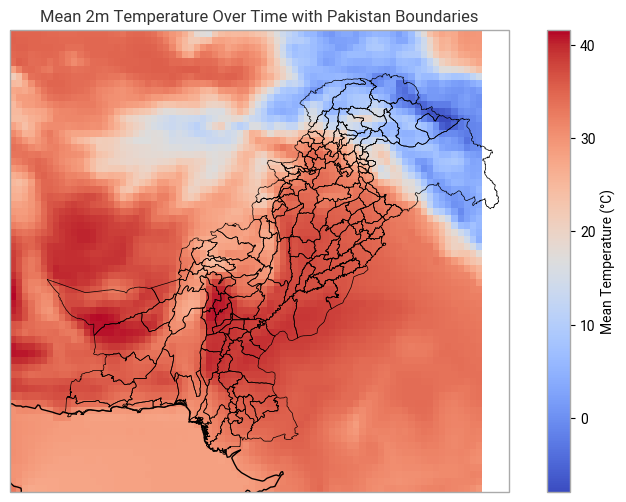

In [20]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd

# Load Pakistan shapefile
pakistan = gpd.read_file(r"D:\FYP\active\shape\District_Boundary.shp")  # Update the path

# Create a figure with Cartopy projection
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot temperature data
plt.pcolormesh(ds.longitude, ds.latitude, mean_temp_celsius, cmap="coolwarm", transform=ccrs.PlateCarree())

# Add colorbar
plt.colorbar(label="Mean Temperature (°C)")

# Plot Pakistan boundaries
pakistan.boundary.plot(ax=ax, edgecolor="black", linewidth=0.5)

# Add gridlines and labels
ax.coastlines()
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Mean 2m Temperature Over Time with Pakistan Boundaries")

plt.show()
